# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA19 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA19issues.json

In [3]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [4]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA19issues.json')]

In [5]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [6]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

Author   State   closed_at  created_at  issue_number  \
0    ZFA19SCM21X  closed  2019-11-10  2019-11-10           510   
1     SPM587FA19    open        None  2019-11-10           509   
2     SPM587FA19    open        None  2019-11-10           508   
3     SPM587FA19    open        None  2019-11-10           507   
4     SPM587FA19    open        None  2019-11-10           506   
5     SPM587FA19    open        None  2019-11-10           505   
6     SPM587FA19    open        None  2019-11-10           504   
7     SPM587FA19    open        None  2019-11-10           503   
8     SPM587FA19    open        None  2019-11-10           502   
9     SPM587FA19    open        None  2019-11-10           501   
10    SPM587FA19    open        None  2019-11-09           500   
11    SPM587FA19    open        None  2019-11-09           499   
12    SPM587FA19    open        None  2019-11-09           498   
13    SPM587FA19    open        None  2019-11-09           497   
14    SPM587FA19    open        None  2019-11-09           496   
15    SPM587FA19    open        None  2019-11-09           495   
16    SPM587FA19    open        None  2019-11-09           494   
17    SPM587FA19    open        None  2019-11-09           493   
18    SPM587FA19    open        None  2019-11-09           492   
19    SPM587FA19    open        None  2019-11-09           491   
20   HFA19SCM15L  closed  2019-11-09  2019-11-09           490   
21   HFA19SCM15L  closed  2019-11-09  2019-11-09           488   
22   CFA19SCM34L    open        None  2019-11-09           486   
23   CFA19SCM34L    open        None  2019-11-09           485   
24   MFA19SCM89C    open        None  2019-11-09           478   
25   XFA19SCM40Z    open        None  2019-11-09           475   
26   KFA19SCM16Y  closed  2019-11-09  2019-11-09           474   
27   MFA19SCM89C  closed  2019-11-09  2019-11-09           473   
28   YFA19SCM95C  closed  2019-11-09  2019-11-09           469   
29   KFA19SCM16Y  closed  2019-11-09  2019-11-09           467   
..           ...     ...         ...         ...           ...   
305   SPM587FA19  closed  2019-10-31  2019-10-31            31   
306   SPM587FA19  closed  2019-11-01  2019-10-31            30   
307   SPM587FA19  closed  2019-11-02  2019-10-31            29   
308   SPM587FA19  closed  2019-10-31  2019-10-31            28   
309  RFA19SCM45R  closed  2019-10-31  2019-10-31            26   
310  JFA19SCM01S    open        None  2019-10-31            25   
311   SPM587FA19  closed  2019-11-01  2019-10-30            24   
312   SPM587FA19  closed  2019-10-31  2019-10-30            23   
313   SPM587FA19  closed  2019-11-02  2019-10-30            22   
314   SPM587FA19  closed  2019-10-31  2019-10-30            21   
315   SPM587FA19  closed  2019-11-01  2019-10-30            20   
316   SPM587FA19  closed  2019-10-31  2019-10-30            19   
317   SPM587FA19  closed  2019-11-02  2019-10-30            18   
318   SPM587FA19  closed  2019-10-31  2019-10-30            17   
319   SPM587FA19  closed  2019-11-01  2019-10-30            16   
320   SPM587FA19  closed  2019-11-03  2019-10-30            15   
321   SPM587FA19  closed  2019-11-01  2019-10-30            14   
322   SPM587FA19  closed  2019-11-02  2019-10-30            13   
323   SPM587FA19  closed  2019-11-01  2019-10-30            12   
324   SPM587FA19  closed  2019-11-01  2019-10-30            11   
325   SPM587FA19  closed  2019-10-31  2019-10-30            10   
326   SPM587FA19  closed  2019-11-03  2019-10-30             9   
327   SPM587FA19  closed  2019-10-31  2019-10-30             8   
328   SPM587FA19  closed  2019-11-01  2019-10-30             7   
329   SPM587FA19  closed  2019-10-31  2019-10-30             6   
330   SPM587FA19  closed  2019-10-31  2019-10-30             5   
331   SPM587FA19  closed  2019-10-30  2019-10-30             4   
332   SPM587FA19  closed  2019-10-30  2019-10-30             3   
333  PFA19SCM29Z  closed  2019-10-29  2019-10-28  

In [7]:
len(
issues_df['labels'][10]
)

5

In [8]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [9]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
       
        for label in wrangled_issues_df.iloc[i]['labels']:
            #if(len(issues_df['labels'][i])==5):
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
          
 

In [10]:
len(wrangled_issues_df)


335

In [11]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    ZFA19SCM21X  closed  2019-11-10  2019-11-10           510   
1     SPM587FA19    open        None  2019-11-10           509   
2     SPM587FA19    open        None  2019-11-10           508   
3     SPM587FA19    open        None  2019-11-10           507   
4     SPM587FA19    open        None  2019-11-10           506   
5     SPM587FA19    open        None  2019-11-10           505   
6     SPM587FA19    open        None  2019-11-10           504   
7     SPM587FA19    open        None  2019-11-10           503   
8     SPM587FA19    open        None  2019-11-10           502   
9     SPM587FA19    open        None  2019-11-10           501   
10    SPM587FA19    open        None  2019-11-09           500   
11    SPM587FA19    open        None  2019-11-09           499   
12    SPM587FA19    open        None  2019-11-09           498   
13    SPM587FA19    open        None  2019-11-09           497   
14    SPM587FA19    open        None  2019-11-09           496   
15    SPM587FA19    open        None  2019-11-09           495   
16    SPM587FA19    open        None  2019-11-09           494   
17    SPM587FA19    open        None  2019-11-09           493   
18    SPM587FA19    open        None  2019-11-09           492   
19    SPM587FA19    open        None  2019-11-09           491   
20   HFA19SCM15L  closed  2019-11-09  2019-11-09           490   
21   HFA19SCM15L  closed  2019-11-09  2019-11-09           488   
22   CFA19SCM34L    open        None  2019-11-09           486   
23   CFA19SCM34L    open        None  2019-11-09           485   
24   MFA19SCM89C    open        None  2019-11-09           478   
25   XFA19SCM40Z    open        None  2019-11-09           475   
26   KFA19SCM16Y  closed  2019-11-09  2019-11-09           474   
27   MFA19SCM89C  closed  2019-11-09  2019-11-09           473   
28   YFA19SCM95C  closed  2019-11-09  2019-11-09           469   
29   KFA19SCM16Y  closed  2019-11-09  2019-11-09           467   
..           ...     ...         ...         ...           ...   
305   SPM587FA19  closed  2019-10-31  2019-10-31            31   
306   SPM587FA19  closed  2019-11-01  2019-10-31            30   
307   SPM587FA19  closed  2019-11-02  2019-10-31            29   
308   SPM587FA19  closed  2019-10-31  2019-10-31            28   
309  RFA19SCM45R  closed  2019-10-31  2019-10-31            26   
310  JFA19SCM01S    open        None  2019-10-31            25   
311   SPM587FA19  closed  2019-11-01  2019-10-30            24   
312   SPM587FA19  closed  2019-10-31  2019-10-30            23   
313   SPM587FA19  closed  2019-11-02  2019-10-30            22   
314   SPM587FA19  closed  2019-10-31  2019-10-30            21   
315   SPM587FA19  closed  2019-11-01  2019-10-30            20   
316   SPM587FA19  closed  2019-10-31  2019-10-30            19   
317   SPM587FA19  closed  2019-11-02  2019-10-30            18   
318   SPM587FA19  closed  2019-10-31  2019-10-30            17   
319   SPM587FA19  closed  2019-11-01  2019-10-30            16   
320   SPM587FA19  closed  2019-11-03  2019-10-30            15   
321   SPM587FA19  closed  2019-11-01  2019-10-30            14   
322   SPM587FA19  closed  2019-11-02  2019-10-30            13   
323   SPM587FA19  closed  2019-11-01  2019-10-30            12   
324   SPM587FA19  closed  2019-11-01  2019-10-30            11   
325   SPM587FA19  closed  2019-10-31  2019-10-30            10   
326   SPM587FA19  closed  2019-11-03  2019-10-30             9   
327   SPM587FA19  closed  2019-10-31  2019-10-30             8   
328   SPM587FA19  closed  2019-11-01  2019-10-30             7   
329   SPM587FA19  closed  2019-10-31  2019-10-30             6   
330   SPM587FA19  closed  2019-10-31  2019-10-30             5   
331   SPM587FA19  closed  2019-10-30  2019-10-30             4   
332   SPM587FA19  closed  2019-10-30  2019-10-30             3   
333  PFA19SCM29Z  closed  2019-10-29  2019-10-28  

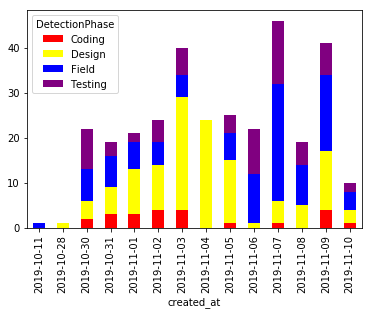

In [12]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

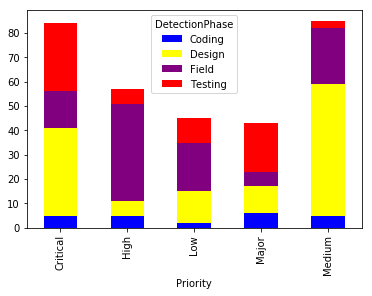

In [13]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

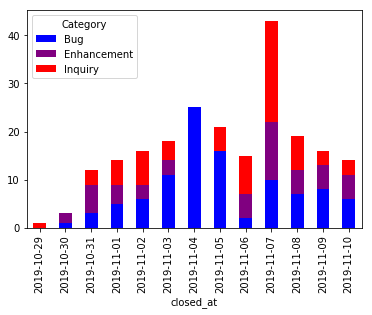

In [14]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)

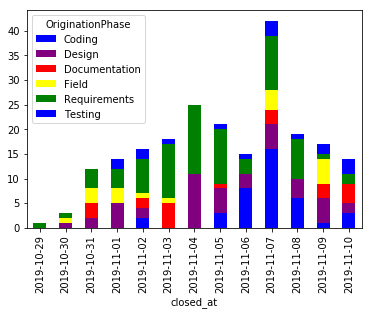

In [15]:
#  Plot in Bar Chart the total number of issues closed every day for every Origination Phase 

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)

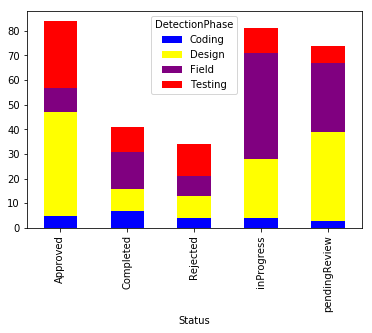

In [16]:
#Plot in Bar Chart the total number of issues created for every Phase based on their Status 
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

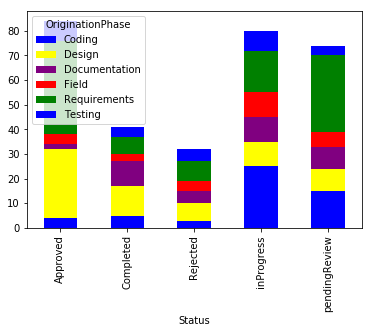

In [17]:
#Plot in Bar Chart the total number of issues created for every Phase based on their Status 
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

In [18]:
#Requirement #3: Plot in Bar Chart the total number of issues for
x1 = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Priority']=='Critical')]
x2 = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Status']=='Completed')]
x3 = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Priority']=='Critical') & (wrangled_issues_df['Status']=='Approved')]
x4 = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field') & ((wrangled_issues_df['Status']=='Approved') | (wrangled_issues_df['Status']=='inProgress'))]
x5 = x4.loc[((wrangled_issues_df['Priority']=='Critical') | (wrangled_issues_df['Priority']=='High'))]
y = [len(x1),len(x2),len(x3),len(x5)]
x = ['DetectionPhase&Priority','DetectionPhase&Status','DetectionPhase&Priority&Status','DetectionPhase&Priority&Status2']
#df= pd.DataFrame(x1,x2)
# LabelsReviewedByDate = x1.groupby(['Priority','DetectionPhase']).Author.count()
# dateLabelsFig = df.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

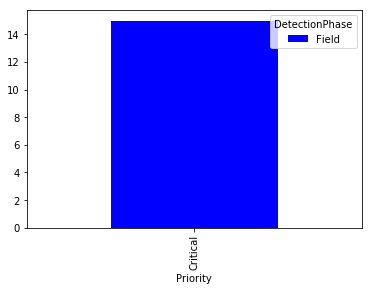

In [22]:
LabelsReviewedByDate = x1.groupby(['Priority','DetectionPhase']).Author.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)



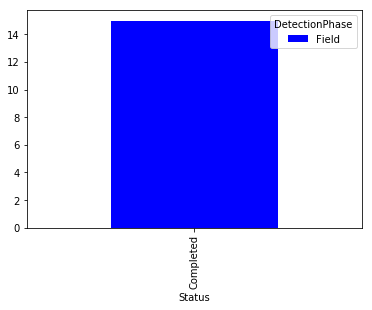

In [23]:
LabelsReviewedByDate = x2.groupby(['Status','DetectionPhase']).Author.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)


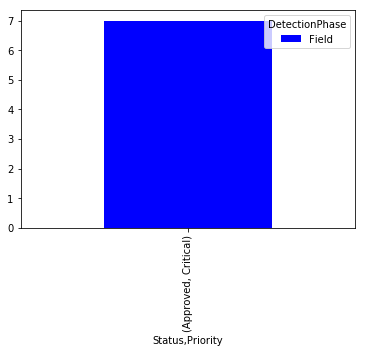

In [25]:
LabelsReviewedByDate = x3.groupby(['Status','Priority','DetectionPhase']).Author.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)


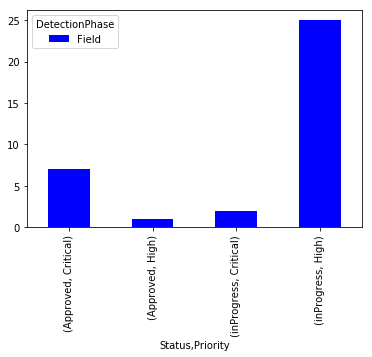

In [26]:
LabelsReviewedByDate = x5.groupby(['Status','Priority','DetectionPhase']).Author.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)